# Breast Cancer Classification 1/2

In [1]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import torch
from torch.utils import data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from transferlearningmodel import Net
from DataLoader import Dataset
from sklearn.model_selection import train_test_split

import torch
from torch import nn
import torchvision
import torchvision.transforms as transform

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from os import path
import pandas as pd
from collections import defaultdict
from skimage import io, transform

In [5]:
from PIL import Image
import os.path

In [7]:
import seaborn as sns
import tensorflow as tf
from PIL import Image
import numpy as np
import cv2
import glob
import time

/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [8]:
rootdir = '/Users/yingyinxiao/breast_cancer'
path_malignant = '/data/malignant'
path_benign = '/data/benign'

## 1. Create the CSV file
- png name with directory
- pixel numbers
- categories
- 1/0

In [9]:
dic4csv = defaultdict(list)

In [12]:
index = 0
for root, dirs, files in os.walk(rootdir):
    for file in files:
        if file.endswith(".png"):
            full_path = ''
            values = root.split('/')
            ordered = [x for x in values if x]
            ordered.append(file)
            
            for i in ordered:
                full_path+='/'+i

            dic4csv[index] = [values[-2], values[-3], values[-4], values[-1], index, full_path]
            index +=1

In [13]:
csv = pd.DataFrame(data = dic4csv).transpose().rename(columns = {0: 'img_name', 1: 'category', 2: 'binary',\
                                                                 3: 'img_size', 4: 'label', 5: 'full_path'})
csv.head()

,img_name,category,binary,img_size,label,full_path
0,SOB_M_MC_14-13418DE,mucinous_carcinoma,malignant,100X,0,/Users/yingyinxiao/breast_cancer/data/malignan...
1,SOB_M_MC_14-13418DE,mucinous_carcinoma,malignant,400X,1,/Users/yingyinxiao/breast_cancer/data/malignan...
2,SOB_M_MC_14-13418DE,mucinous_carcinoma,malignant,400X,2,/Users/yingyinxiao/breast_cancer/data/malignan...
3,SOB_M_MC_14-13418DE,mucinous_carcinoma,malignant,400X,3,/Users/yingyinxiao/breast_cancer/data/malignan...
4,SOB_M_MC_14-13418DE,mucinous_carcinoma,malignant,400X,4,/Users/yingyinxiao/breast_cancer/data/malignan...


In [14]:
#img name might be repetitive, so we concatenated the two columns to make the img_name uniuqe
csv['img_name'] = csv['img_name'] +'_'+ csv['img_size']
csv['img_name']

0       SOB_M_MC_14-13418DE_100X
1       SOB_M_MC_14-13418DE_400X
2       SOB_M_MC_14-13418DE_400X
3       SOB_M_MC_14-13418DE_400X
4       SOB_M_MC_14-13418DE_400X
                  ...           
3878    SOB_B_PT_14-29315EF_200X
3879    SOB_B_PT_14-29315EF_200X
3880    SOB_B_PT_14-29315EF_200X
3881    SOB_B_PT_14-29315EF_200X
3882    SOB_B_PT_14-29315EF_200X
Name: img_name, Length: 3883, dtype: object

In [15]:
#the helper function is to convert malignant and benign into 1 and 0
def helper(row):
    if row == 'malignant':
        return 1
    else: return 0

In [16]:
csv['binary'] = csv['binary'].apply(helper)

In [17]:
csv.binary.value_counts()

0    2490
1    1393
Name: binary, dtype: int64

In [18]:
#to make sure that we got all the images from the drive
index == csv.shape[0]

True

## 2. Early exploration

In [10]:
#load the dataset
csv = pd.read_csv('csv.csv').drop('Unnamed: 0', axis = 1)

In [19]:
csv.head()

,img_name,category,binary,img_size,label,full_path
0,SOB_M_MC_14-13418DE_100X,mucinous_carcinoma,1,100X,0,/Users/yingyinxiao/breast_cancer/data/malignan...
1,SOB_M_MC_14-13418DE_400X,mucinous_carcinoma,1,400X,1,/Users/yingyinxiao/breast_cancer/data/malignan...
2,SOB_M_MC_14-13418DE_400X,mucinous_carcinoma,1,400X,2,/Users/yingyinxiao/breast_cancer/data/malignan...
3,SOB_M_MC_14-13418DE_400X,mucinous_carcinoma,1,400X,3,/Users/yingyinxiao/breast_cancer/data/malignan...
4,SOB_M_MC_14-13418DE_400X,mucinous_carcinoma,1,400X,4,/Users/yingyinxiao/breast_cancer/data/malignan...


### How many benign and malignant data in the dataset?

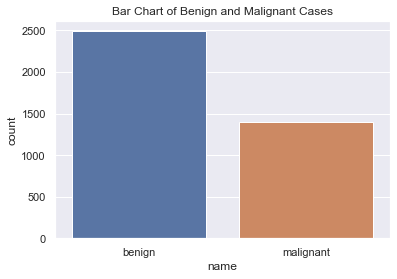

In [73]:
fig, ax = plt.subplots()   
sns.set(style="darkgrid")
bar_df = csv.groupby('binary')[['img_name']].count()
bar_df = bar_df.rename(columns = {'img_name': 'count'})
bar_df['name'] = ['benign', 'malignant']
sns_plot = sns.barplot(data = bar_df, x = 'name', y = 'count').set_title('Bar Chart of Benign and Malignant Cases')
fig = sns_plot.get_figure()
fig.savefig("figures/barchart_binary.png")

The binary data is obviously imbalanced, which will be adjusted later. There are more benigh than malignant images.

### How many benign and malignant data are there in the dataset by pixels?

In [96]:
bar_df2 = csv.groupby(['binary', 'img_size'])[['img_name']].count()
bar_df2 = bar_df2.rename(columns = {'img_name': 'count'})

In [101]:
bar_df2['binary'] = [x[0] for x in bar_df2.index]
bar_df2['img_size'] = [x[1] for x in bar_df2.index]
bar_df2

count  binary img_size
binary img_size                        
0      100X        648       0     100X
       200X        623       0     200X
       400X        594       0     400X
       40X         625       0      40X
1      100X        395       1     100X
       200X        367       1     200X
       400X        288       1     400X
       40X         343       1      40X

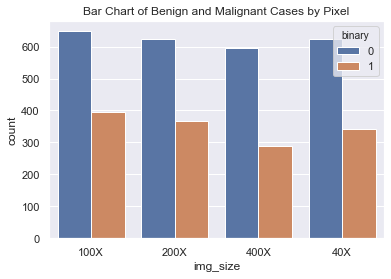

In [103]:
fig, ax = plt.subplots()   
sns.set(style="darkgrid")
ax = sns.barplot(data = bar_df2, x = 'img_size', y = 'count', hue = 'binary').set_title(\
                                                        'Bar Chart of Benign and Malignant Cases by Pixel')
fig = ax.get_figure()
fig.savefig("figures/barchart_binary_pixel.png")

### How are the categories distributed in the dataset?

In [17]:
csv.groupby(['binary', 'category']).describe()

label                                       \
                             count    mean         std     min      25%   
binary category                                                           
0      adenosis              444.0  1614.5  128.316016  1393.0  1503.75   
       fibroadenoma         1024.0  2917.5  295.747640  2406.0  2661.75   
       phyllodes_tumor       453.0  3656.0  130.914094  3430.0  3543.00   
       tubular_adenoma       569.0  2121.0  164.400426  1837.0  1979.00   
1      ductal_carcinoma      991.0   785.0  286.221360   290.0   537.50   
       lobular_carcinoma     112.0  1336.5   32.475632  1281.0  1308.75   
       mucinous_carcinoma    150.0    74.5   43.445368     0.0    37.25   
       papillary_carcinoma   140.0   219.5   40.558600   150.0   184.75   

                                                     
                               50%      75%     max  
binary category                                      
0      adenosis             1614.5  1725.25  1836.0  
       fibroadenoma         2917.5  3173.25  3429.0  
       phyllodes_tumor      3656.0  3769.00  3882.0  
       tubular_adenoma      2121.0  2263.00  2405.0  
1      ductal_carcinoma      785.0  1032.50  1280.0  
       lobular_carcinoma    1336.5  1364.25  1392.0  
       mucinous_carcinoma     74.5   111.75   149.0  
       papillary_carcinoma   219.5   254.25   289.0

In [111]:
maldf = csv.groupby(['binary', 'category'])[['img_name']].count()
maldf = maldf.rename(columns = {'img_name': 'count'})
maldf['binary'] = [x[0] for x in maldf.index]
maldf['category'] = [x[1] for x in maldf.index]

In [112]:
maldf

count  binary             category
binary category                                               
0      adenosis               444       0             adenosis
       fibroadenoma          1024       0         fibroadenoma
       phyllodes_tumor        453       0      phyllodes_tumor
       tubular_adenoma        569       0      tubular_adenoma
1      ductal_carcinoma       991       1     ductal_carcinoma
       lobular_carcinoma      112       1    lobular_carcinoma
       mucinous_carcinoma     150       1   mucinous_carcinoma
       papillary_carcinoma    140       1  papillary_carcinoma

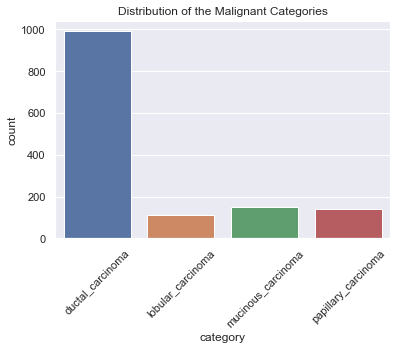

In [119]:
fig, ax = plt.subplots()   
sns.set(style="darkgrid")
ax = sns.barplot(data = maldf[maldf.binary == 1], x = 'category', y = 'count').set_title(\
                                                     'Distribution of the Malignant Categories')
plt.xticks(rotation=45)
fig = ax.get_figure()
fig.savefig("figures/barchart_malignant_categories.png")

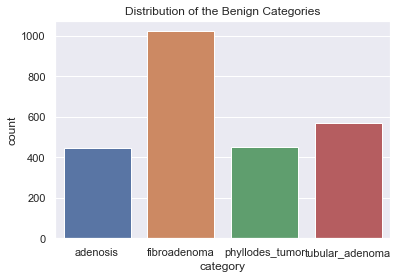

In [116]:
fig, ax = plt.subplots()   
sns.set(style="darkgrid")
ax = sns.barplot(data = maldf[maldf.binary == 0], x = 'category', y = 'count').set_title(\
                                                     'Distribution of the Benign Categories')
fig = ax.get_figure()
fig.savefig("figures/barchart_benign_categories.png")

## 3. The Data loader Class

In [36]:
csv.head()

,img_name,category,binary,img_size,label,full_path
0,SOB_M_MC_14-13418DE_100X,mucinous_carcinoma,1,100X,0,/Users/yingyinxiao/breast_cancer/data/malignan...
1,SOB_M_MC_14-13418DE_400X,mucinous_carcinoma,1,400X,1,/Users/yingyinxiao/breast_cancer/data/malignan...
2,SOB_M_MC_14-13418DE_400X,mucinous_carcinoma,1,400X,2,/Users/yingyinxiao/breast_cancer/data/malignan...
3,SOB_M_MC_14-13418DE_400X,mucinous_carcinoma,1,400X,3,/Users/yingyinxiao/breast_cancer/data/malignan...
4,SOB_M_MC_14-13418DE_400X,mucinous_carcinoma,1,400X,4,/Users/yingyinxiao/breast_cancer/data/malignan...


In [47]:
csv.shape

(3883, 6)

In [49]:
csv_path = 'Users⁩/⁨yingyinxiao⁩/⁨breast_cancer⁩/⁨Breast-Cancer-Classification⁩/csv.csv'
root_dir = "Users/⁨yingyinxiao⁩/⁨breast_cancer⁩/data⁨"

### Return a dictionary of the image(array) and label(int)

In [42]:
class DataLoader(data.Dataset):
    """
    Args:
        csv_file (string): Path to the csv file with annotations.
        root_dir (string): Directory with all the images.
        transform (callable, optional): Optional transform to be applied
            on a sample.
    """
    def __init__(self, csv_file, transform = None):
        'Initialization'
        self.frame = pd.read_csv(csv_file)
        self.transform = transform

    def __len__(self):
        'Denotes the total number of samples'
        return len(self.frame)

    def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        img_name = self.frame.iloc[index, 6]
        image = io.imread(img_name)
        
        label = self.frame.iloc[index, 3]
        # Load data and get label
         
        sample = {'image': image, 'label': label}
        
        if self.transform:
            sample = self.transform(sample)
            
        return sample

### Iterate through some images

In [79]:
from DataLoader import Dataset
from skimage import io

In [84]:
dataset = DataLoader('csv.csv')

0 (460, 700, 3) 1
1 (460, 700, 3) 1
2 (460, 700, 3) 1
3 (460, 700, 3) 1


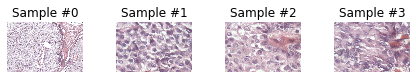

In [85]:
fig = plt.figure()

for i in range(len(dataset)):
    sample = dataset[i]
    print(i, sample['image'].shape, sample['label'])

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    plt.imshow(sample['image'])

    if i == 3:
        plt.show()
        break

## 4. Train the model

### Create the train_model class that output the loss and accuracy

In [62]:
def train_model(train_loader, val_loader):

    # Define relevant testing parameters - the loss per iteration/epoch for training
    # and validation sets
    train_loss_per_iter = []
    train_epoch_loss = []
    val_loss_per_iter = []
    val_epoch_loss = []
    val_epoch_acc = []

    # Define the cnn model
    model = Net()

    # Define the cost function
    criterion = nn.BCELoss()

    # Define the optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)

    best_val_loss = float('inf') 
    # hold off on variable for now (use this to check if the model loss is increasing x number of times)

    # Runs through one batch in the train_loader
    for epoch in range(1):

        # Define variables to accumulate the loss over the total epoch
        train_epoch_loss_var = 0
        val_epoch_loss_var = 0

        # This for loop is for the training set data
        # ********** Coordinate with the dataloader *************
        # this for loops is looking for a tuple(?) of images and labels
        for imgs, labels in (train_loader):
            
            print(imgs)
            print(labels)

            imgs = torch.from_numpy(imgs)

            # Zeroes the gradients so they don't accumulate
            optimizer.zero_grad()

            # Pass one image forward through the cnn
            outputs = model(imgs[0])

            # Assigns the loss function to the outputs
            loss = criterion(outputs, labels)
            clear(outputs)

            # Computes the gradients with respect to the cost function
            loss.backward()

            # Move in the direction of gradient descent
            optimizer.step()

            train_loss_per_iter.append(loss)
            train_epoch_loss_var += loss


        # This for loop is for the validation set data
        for (imgs, labels) in val_loader:

            # Pass one image forward through the cnn
            outputs = model(imgs)

            # Assigns the loss function to the outputs
            loss = criterion(outputs, labels)

            # Save loss per iteration
            val_loss_per_iter.append(loss)
            val_epoch_loss_var += loss

    # Save values of loss over total epoch
    train_epoch_loss.append(train_epoch_loss_var)
    val_epoch_loss.append(val_epoch_loss_var)
    
    torch.save(model, 'saved_model.pt')
    
    return  train_loss_per_iter, train_epoch_loss, val_loss_per_iter, val_epoch_loss, val_epoch_acc

In [45]:
%%time
train, val, test = get_loader('csv.csv', 0.1, 0.8, 0.1, 2, True, None)

CPU times: user 53.7 s, sys: 5.92 s, total: 59.6 s
Wall time: 1min 25s


In [113]:
X_train = [i[0] for i in train]
X_val = [i[0] for i in val]
X_test = [i[0] for i in test]

In [114]:
y_train = [i[1] for i in train]
y_val = [i[1] for i in val]
y_test = [i[1] for i in test]

In [172]:
pd.Series(y_train).value_counts()

0    1810
1     985
dtype: int64

In [173]:
pd.Series(y_val).value_counts()

0    212
1    138
dtype: int64

In [174]:
pd.Series(y_test).value_counts()

0    238
1    151
dtype: int64

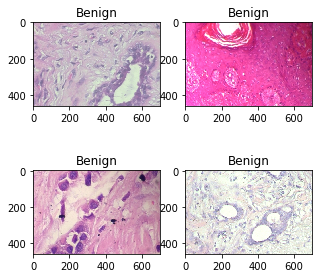

In [177]:
fig = plt.figure(figsize=(5, 5))
for i in range(1, 5):
    ax = fig.add_subplot(2, 2, i)
    if np.argmax(y_train[i]) == 0:
        ax.title.set_text('Benign')
        plt.imshow(X_train[i], interpolation='nearest')

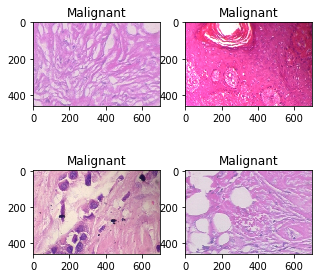

In [194]:
fig = plt.figure(figsize=(5, 5))
cond = True
j = 0
i = 1
while cond:
    if y_train[j] == 1:
        ax = fig.add_subplot(2, 2, i)
        ax.title.set_text('Malignant')
        plt.imshow(X_train[j], interpolation='nearest')
        i += 1
    j += 1
    if i == 5: cond = False      

In [ ]:
show_batch(images)